In [4305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [4306]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'

In [4307]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)

df_test = pd.read_csv(TEST_DATASET_PATH)

df_train.shape, df_test.shape

((7500, 17), (2500, 16))

### Описание датасета

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [4308]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

# Анализ данных

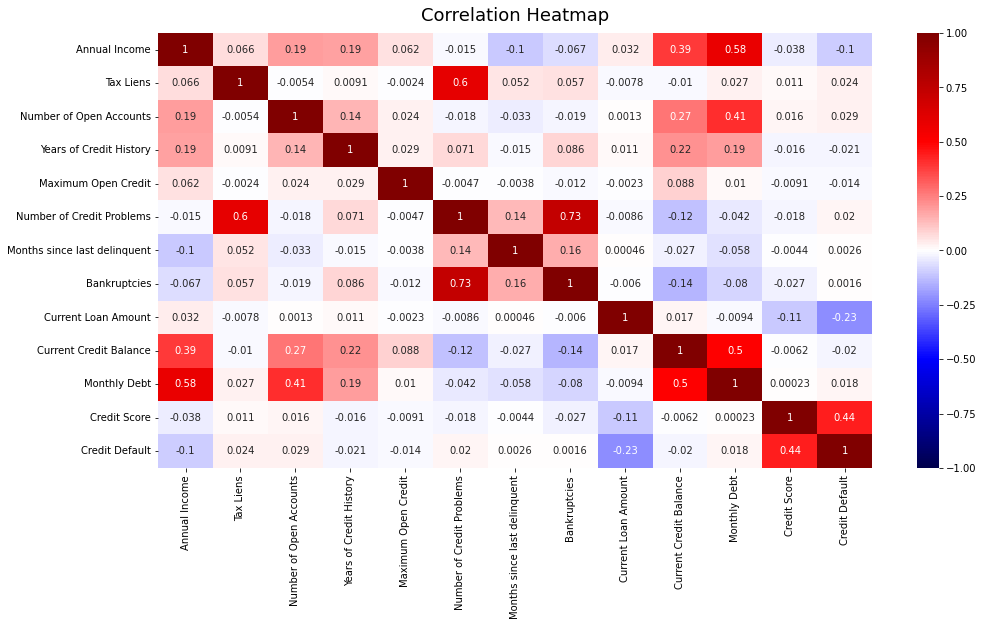

In [4309]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

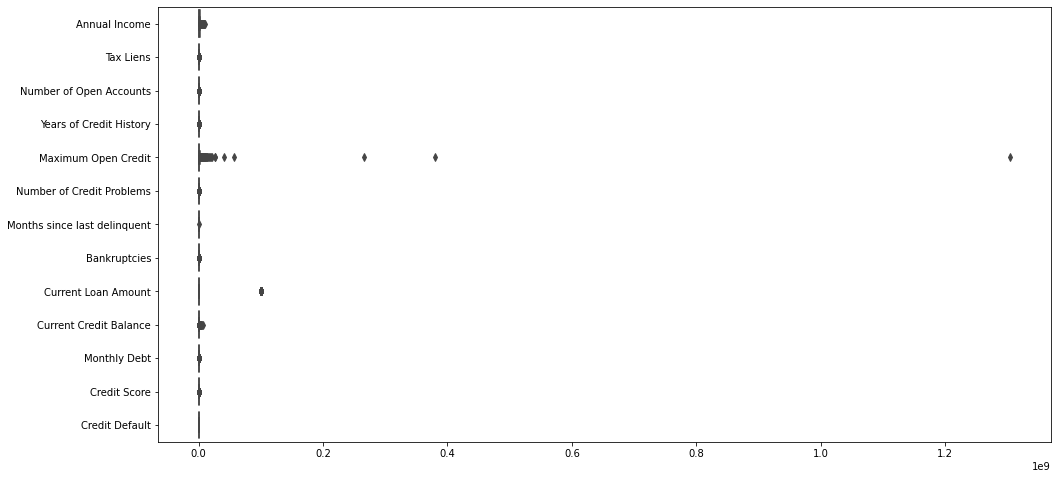

In [4310]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_train, orient='h')
plt.show()

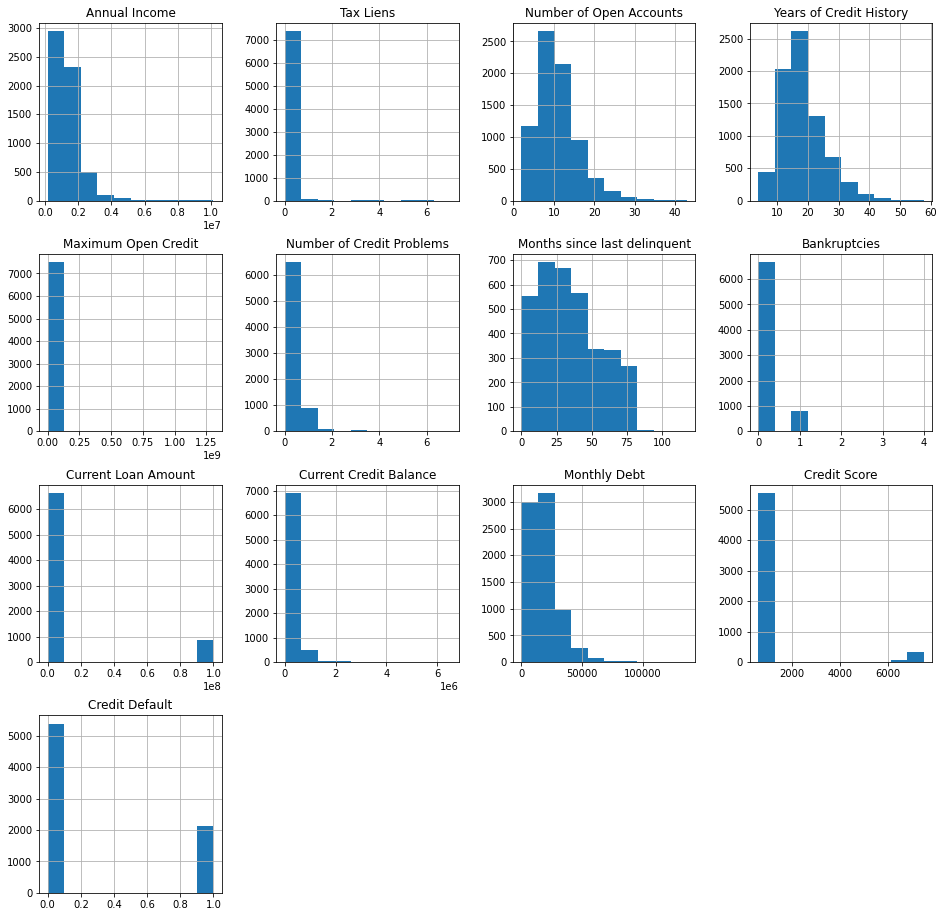

In [4311]:
df_train.hist(figsize=(16,16))
plt.show()

# Обработка выбросов

In [4312]:
df = df_train.copy()

### Number of Credit Problems

In [4313]:
df['Number of Credit Problems'].describe()

count    7500.000000
mean        0.170000
std         0.498598
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Number of Credit Problems, dtype: float64

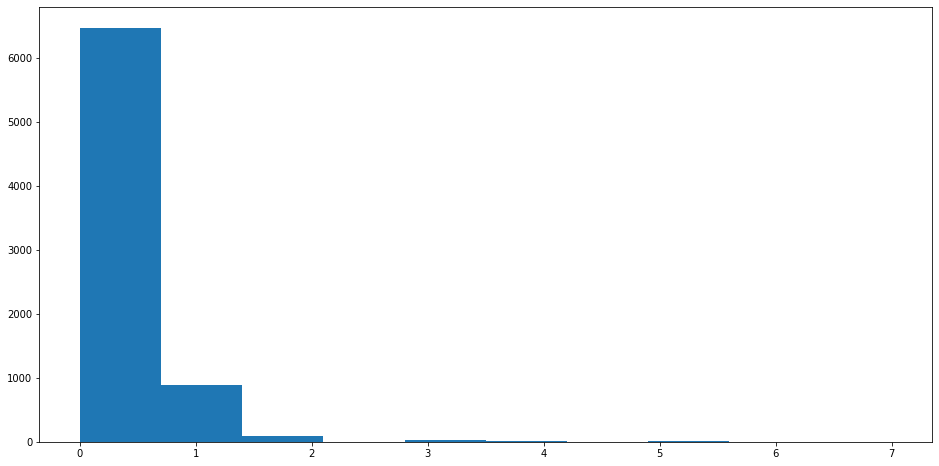

In [4314]:
plt.figure(figsize=(16, 8))
plt.hist(df['Number of Credit Problems'])
plt.show()

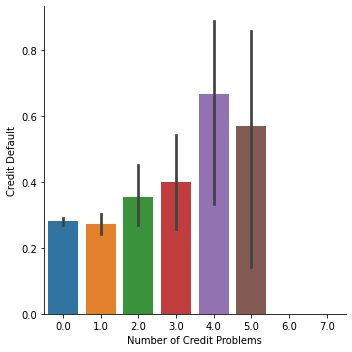

In [4315]:
sns.catplot(x='Number of Credit Problems',
            y='Credit Default',
            kind='bar',
            data=df);

In [4316]:
df.loc[df['Number of Credit Problems'] > 2, 'Number of Credit Problems'] = 2

### Annual Income

In [4317]:
df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

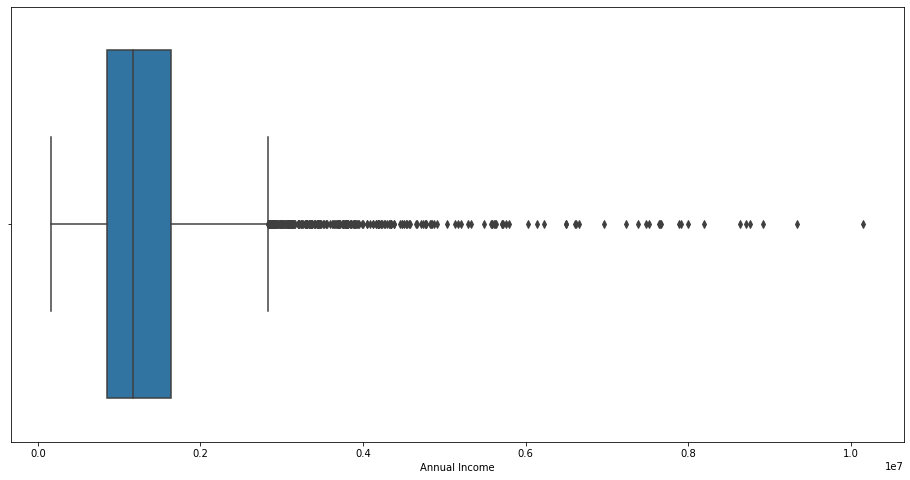

In [4318]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Annual Income', data=df)
plt.show()

In [4319]:
Annual_Income_max = 6000000

In [4320]:
df.loc[df['Annual Income'] > Annual_Income_max, 'Annual Income'] = 6000000

### Current Credit Balance

In [4321]:
df['Current Credit Balance'].describe()

count    7.500000e+03
mean     2.898332e+05
std      3.178714e+05
min      0.000000e+00
25%      1.142565e+05
50%      2.093230e+05
75%      3.604062e+05
max      6.506797e+06
Name: Current Credit Balance, dtype: float64

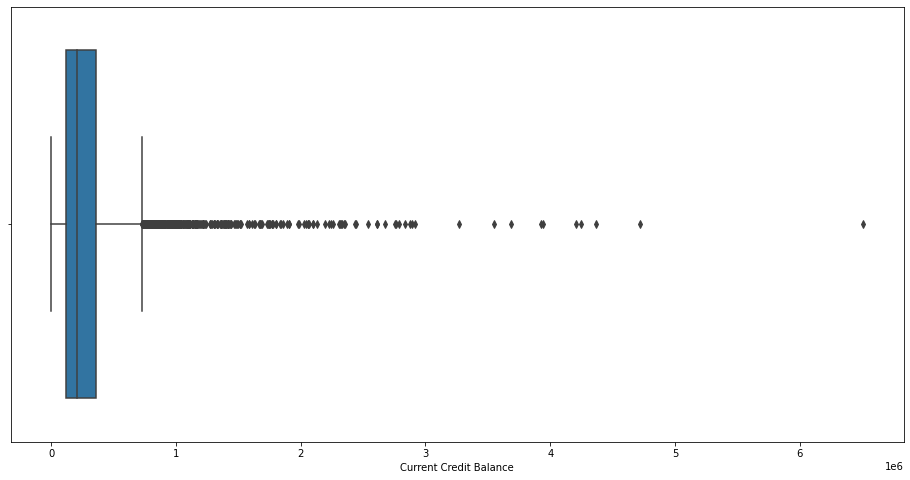

In [4322]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Current Credit Balance', data=df)
plt.show()

In [4323]:
Current_Credit_Balance_max = 1500000

In [4324]:
df.loc[(df['Current Credit Balance'] > Current_Credit_Balance_max), 'Current Credit Balance'] = df['Current Credit Balance'].median()

### Number of Open Accounts

In [4325]:
df['Number of Open Accounts'].describe()

count    7500.000000
mean       11.130933
std         4.908924
min         2.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        43.000000
Name: Number of Open Accounts, dtype: float64

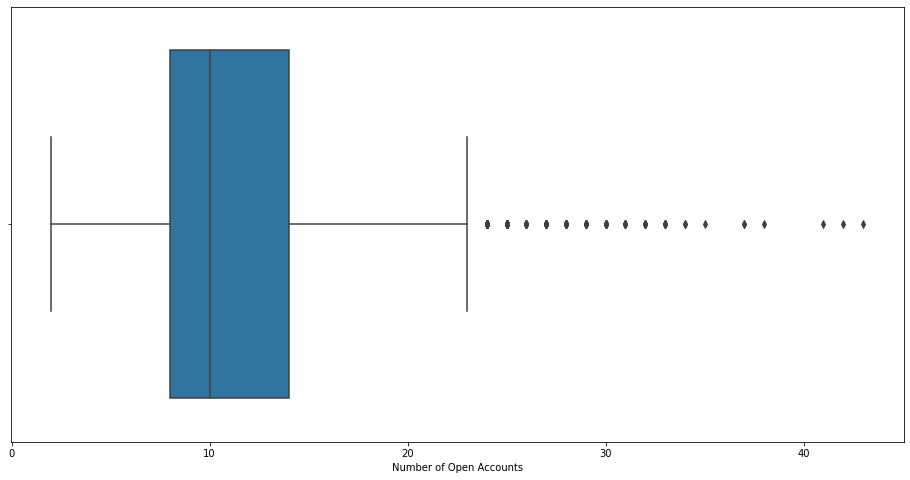

In [4326]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Number of Open Accounts', data=df)
plt.show()

<AxesSubplot:xlabel='Credit Default', ylabel='Number of Open Accounts'>

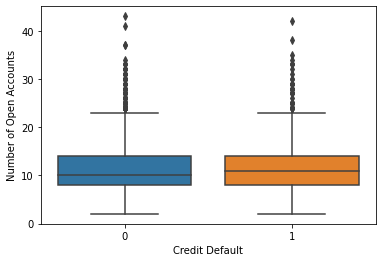

In [4327]:
sns.boxplot(x='Credit Default', y='Number of Open Accounts', data=df)

In [4328]:
df.loc[df['Number of Open Accounts'] > 35, 'Number of Open Accounts'].value_counts()

37.0    2
43.0    1
41.0    1
38.0    1
42.0    1
Name: Number of Open Accounts, dtype: int64

In [4329]:
df.loc[df['Number of Open Accounts'] > 35, 'Number of Open Accounts'] = 35

### Current Loan Amount

In [4330]:
df['Current Loan Amount'].describe()

count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

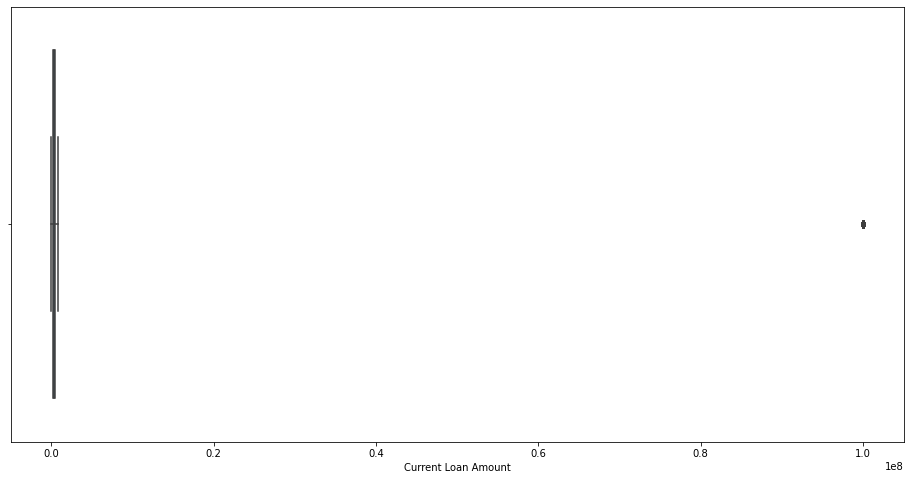

In [4331]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['Current Loan Amount'])
plt.show()

In [4332]:
df.loc[df['Current Loan Amount'] > 800000, 'Credit Default'].value_counts()

0    870
Name: Credit Default, dtype: int64

In [4333]:
df.loc[df['Current Loan Amount'] > 800000, 'Current Loan Amount'] = df['Current Loan Amount'].median()

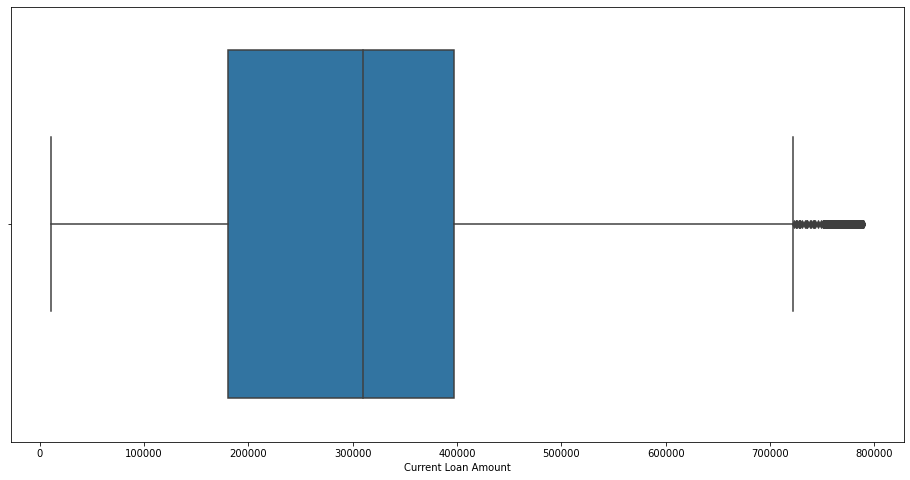

In [4334]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['Current Loan Amount'])
plt.show()

### Monthly Debt

In [4335]:
df['Monthly Debt'].describe()

count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

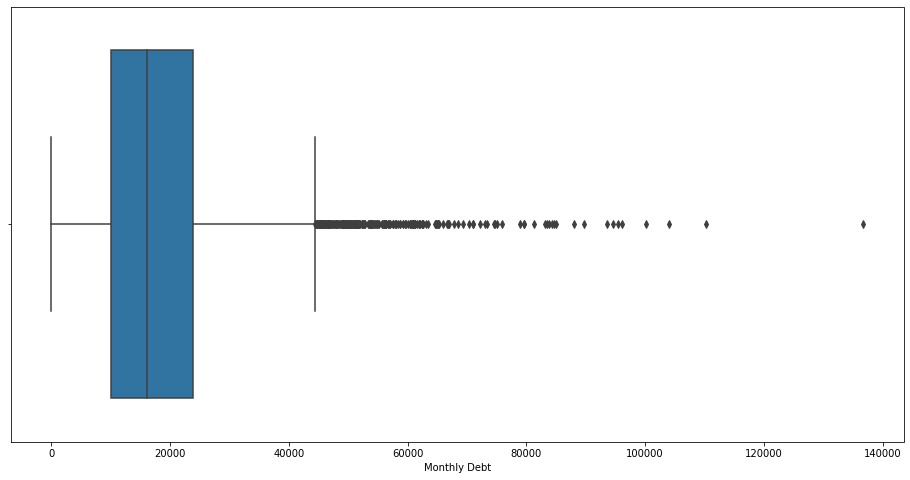

In [4336]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['Monthly Debt'])
plt.show()

In [4337]:
df.loc[df['Monthly Debt'] > 60000, 'Credit Default'].value_counts()

0    45
1    22
Name: Credit Default, dtype: int64

In [4338]:
df.loc[df['Monthly Debt'] > 60000, 'Monthly Debt'] = df['Monthly Debt'].median()

### Tax Liens

In [4339]:
df['Tax Liens'].describe()

count    7500.000000
mean        0.030133
std         0.271604
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Tax Liens, dtype: float64

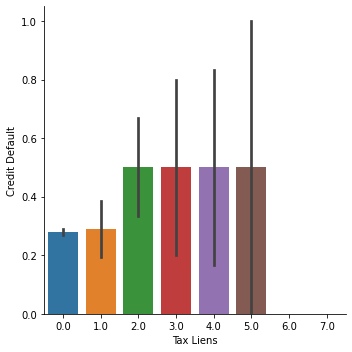

In [4340]:
sns.catplot(x='Tax Liens',
            y='Credit Default',
            kind='bar',
            data=df);

### Years of Credit History

In [4341]:
df['Years of Credit History'].describe()

count    7500.000000
mean       18.317467
std         7.041946
min         4.000000
25%        13.500000
50%        17.000000
75%        21.800000
max        57.700000
Name: Years of Credit History, dtype: float64

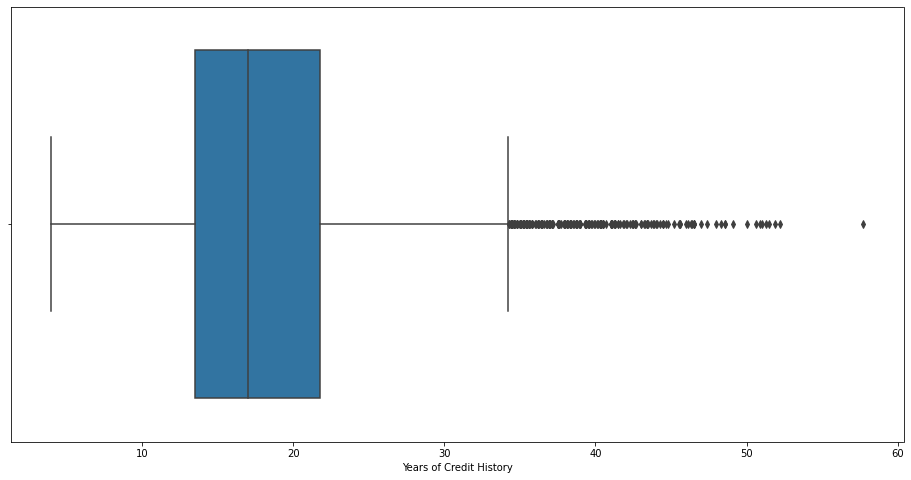

In [4342]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['Years of Credit History'])
plt.show()

In [4343]:
df.loc[df['Years of Credit History'] > 45, 'Years of Credit History'] = 35

### Maximum Open Credit

In [4344]:
df['Maximum Open Credit'].describe()

count    7.500000e+03
mean     9.451537e+05
std      1.602622e+07
min      0.000000e+00
25%      2.792295e+05
50%      4.781590e+05
75%      7.935015e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64

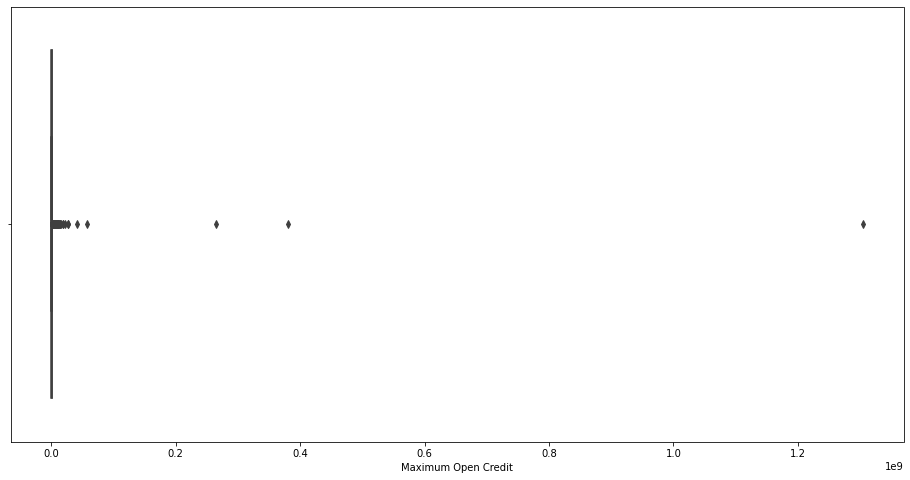

In [4345]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['Maximum Open Credit'])
plt.show()

In [4346]:
df.loc[(df['Maximum Open Credit'] > 900000), 'Credit Default'].value_counts()

0    1135
1     333
Name: Credit Default, dtype: int64

<AxesSubplot:xlabel='Credit Default', ylabel='Maximum Open Credit'>

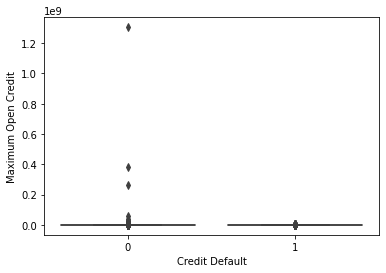

In [4347]:
sns.boxplot(x='Credit Default', y='Maximum Open Credit', data=df)

In [4348]:
df.loc[(df['Maximum Open Credit'] > 1200000), 'Maximum Open Credit'] = df['Maximum Open Credit'].median()

### Months since last delinquent

In [4349]:
df['Months since last delinquent'].describe()

count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

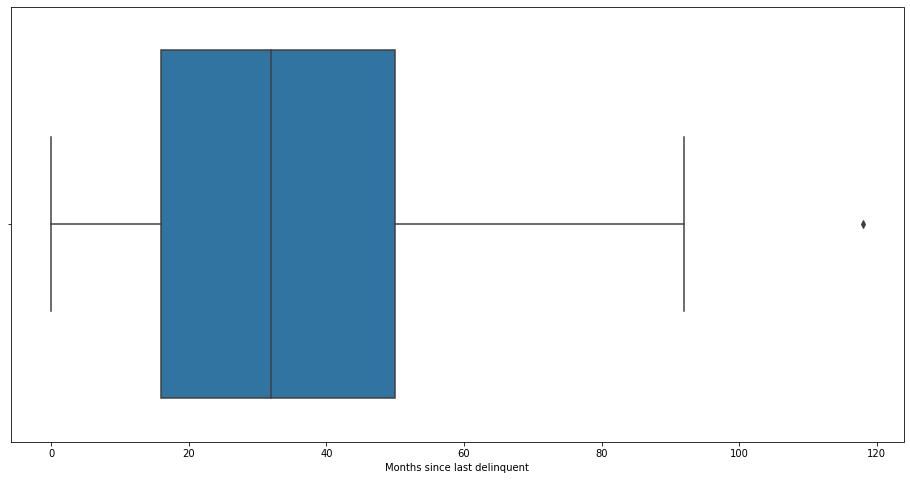

In [4350]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['Months since last delinquent'])
plt.show()

In [4351]:
df.loc[df['Months since last delinquent'] > 95, 'Months since last delinquent'] = 95

### Bankruptcies

In [4352]:
df['Bankruptcies'].describe()

count    7486.000000
mean        0.117152
std         0.347192
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Bankruptcies, dtype: float64

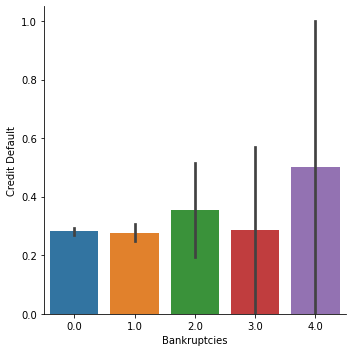

In [4353]:
sns.catplot(x='Bankruptcies',
            y='Credit Default',
            kind='bar',
            data=df);

In [4354]:
df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

### Credit Score

In [4355]:
df['Credit Score'].describe()

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

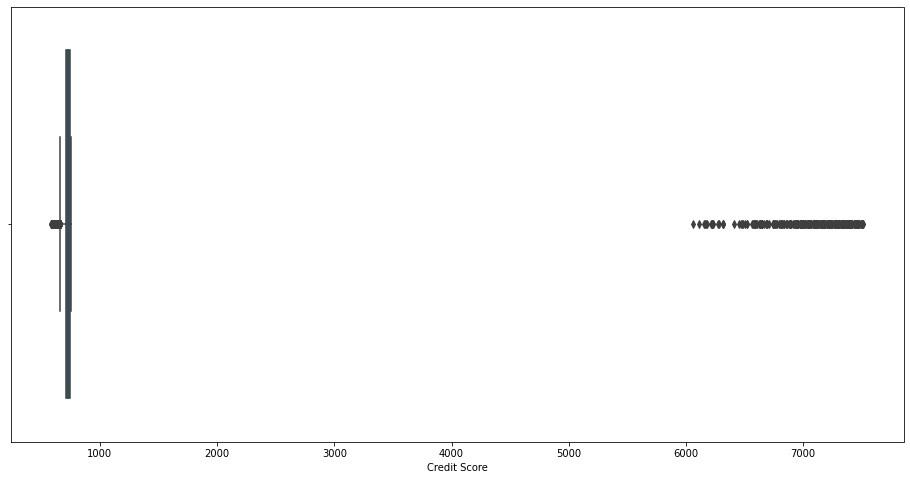

In [4356]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['Credit Score'])
plt.show()

In [4357]:
df.loc[(df['Credit Score'] > 700), 'Credit Default'].value_counts()

0    3691
1    1218
Name: Credit Default, dtype: int64

In [4358]:
df.loc[(df['Credit Score'] > 751) | (df['Credit Score'] < 630), 'Credit Score'].count()

470

In [4359]:
df.loc[(df['Credit Score'] > 751) | (df['Credit Score'] < 630), 'Credit Score'] = df['Credit Score'].median()

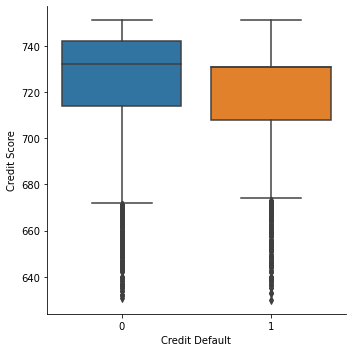

In [4360]:
sns.catplot(y='Credit Score',
            x='Credit Default',
            kind='box',
            data=df);

# Создание класса подготовки данных

In [4361]:
class Data:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.years_mode = None
        self.years_to_numbers = None
        self.Years_of_Credit_History_max = None
        self.Annual_Income_condition = None
        self.Maximum_Open_Credit_max = None
        self.condition_last_delinquent = None
        self.Current_Loan_Amount_max = None
        self.Credit_Score_max = None
        self.Credit_Score_min = None
        self.Annual_Income_max = None
        self.Monthly_Debt_max = None
        self.Months_since_last_delinquent_max = None
        
        
    def fit(self, df):
        
        
        # Расчет медиан
        self.medians = df.median()
        
        
        self.years_mode = df['Years in current job'].mode()[0]
        
        self.years_to_numbers = {'< 1 year': 0,
                                 '1 year': 1,
                                 '2 years': 2,
                                 '3 years': 3,
                                 '4 years': 4,
                                 '5 years': 5,
                                 '6 years': 6,
                                 '7 years': 7,
                                 '8 years': 8,
                                 '9 years': 9,
                                 '10+ years': 10}
        
        self.Years_of_Credit_History_max = 45
        
        self.Annual_Income_max = 6000000
       
        self.Maximum_Open_Credit_max = 1200000
        
        
        self.Credit_Score_max = 751
        self.Credit_Score_min = 630
       
        self.Monthly_Debt_max = 60000
        
        self.Current_Loan_Amount_max = 800000
        
        self.Current_Credit_Balance_max = 1500000
        
        self.Number_of_Open_Accounts_max = 25
        
        self.Months_since_last_delinquent_max = 95
        
        
    def transform(self, df):
        """Трансформация данных"""
            
    # 1. Изменение типа

        # Term, Home Ownership
        df.loc[(df['Home Ownership'] == 'Have Mortgage'), 'Home Ownership'] = 'Home Mortgage' # объединение одинаковых по смыслу свойства признака
        df = pd.get_dummies(df, columns=['Term'])
        df = pd.get_dummies(df, columns=['Home Ownership'])
        
        # Years in current job
        df['Years in current job'].fillna(self.years_mode, inplace=True) # заполнение пропусков наиболее часто встречающимися значениями
        df['Years in current job'].replace(self.years_to_numbers, inplace=True)
    
    
    # 2. Выбросы (outliers)
    
        # Number of Open Accounts
        df['Number of Open Accounts'].clip(upper=self.Number_of_Open_Accounts_max, axis=0, inplace=True)
        
        # Current Credit Balance
        df['Current Credit Balance'].clip(upper=self.Current_Credit_Balance_max, axis=0, inplace=True)

    
        # Years of Credit History
        df['Years of Credit History'].clip(upper=self.Years_of_Credit_History_max, axis=0, inplace=True)
        
        # Maximum Open Credit
        df.loc[df['Maximum Open Credit'] > self.Maximum_Open_Credit_max, 'Maximum Open Credit'] = None
        
        # Monthly Debt
        df['Monthly Debt'].clip(upper=self.Monthly_Debt_max, axis=0, inplace=True)
        
        # Purpose
        df.loc[(df['Purpose'] != 'debt consolidation') & (df['Purpose'] != 'home improvements'), 'Purpose'] = 'other'
        df = pd.get_dummies(df, columns=['Purpose'])
        
        # Credit Score
        df['Credit Score nan'] = 0
        df.loc[df['Credit Score'].isna(), 'Credit Score nan'] = 1
        df['Credit Score outlier'] = 0
        df.loc[(df['Credit Score'] > self.Credit_Score_max) | (df['Credit Score'] < self.Credit_Score_min), 'Credit Score outlier'] = 1
        df.loc[(df['Credit Score'] > self.Credit_Score_max) | (df['Credit Score'] < self.Credit_Score_min), 'Credit Score'] = None 
        
        
    
        # Annual Income
        df['Annual Income nan'] = 0
        df.loc[df['Annual Income'].isna(), 'Annual Income nan'] = 1
        df['Annual Income outlier'] = 0
        df.loc[df['Annual Income'] > self.Annual_Income_max, 'Annual Income outlier'] = 1
        df.loc[df['Annual Income'] > self.Annual_Income_max, 'Annual Income'] = None
        
        # Current Loan Amount
        df['Current Loan Amount outlier'] = 0
        df.loc[df['Current Loan Amount'] > self.Current_Loan_Amount_max, 'Current Loan Amount outlier'] = 1
        df.loc[df['Current Loan Amount'] > self.Current_Loan_Amount_max, 'Current Loan Amount'] = None
    
        # Months since last delinquent
        df['Months since last delinquent nan'] = 0
        df.loc[df['Months since last delinquent'].isna(), 'Months since last delinquent nan'] = 1
        df['Months since last delinquent'].clip(upper=self.Months_since_last_delinquent_max, axis=0, inplace=True)
        
        # Number of Credit Problems
        df.loc[df['Number of Credit Problems'] > 2, 'Number of Credit Problems'] = 2
        
        # Bankruptcies
        df.loc[df['Bankruptcies'] > 2, 'Bankruptcies'] = 2
        
        # Tax Liens
        df.loc[df['Tax Liens'] > 2, 'Tax Liens'] = 2
               
        
    # 3. Пропуски
 

        # Заполнение оставшихся пропусков медианами
        
        df.fillna(self.medians, inplace=True)
        
        

        return df

In [4362]:
X = df_train.drop(columns='Credit Default')

In [4363]:
y = df_train['Credit Default']

# Разбиение выборки

In [4364]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score,  RandomizedSearchCV

# 3. Модели
from sklearn.linear_model import LogisticRegression
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [4365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [4366]:
data = Data()

In [4367]:
data.fit(X_train)

X_train = data.transform(X_train)

X_test = data.transform(X_test)

X_train.isna().sum().sum(), X_test.isna().sum().sum()

(0, 0)

# Балансировка

In [4368]:
y_train.value_counts()

0    3613
1    1412
Name: Credit Default, dtype: int64

In [4369]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [4370]:
y_train.value_counts()

1    3613
0    3613
Name: Credit Default, dtype: int64

# Нормализация

In [4371]:
NUMERIC_FEATURE_NAMES  = X_train.select_dtypes(include={'float', 'int'}).columns.to_list()

In [4372]:
NUMERIC_FEATURE_NAMES

['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Score nan',
 'Credit Score outlier',
 'Annual Income nan',
 'Annual Income outlier',
 'Current Loan Amount outlier',
 'Months since last delinquent nan']

In [4373]:
NUMERIC_FEATURE_NAMES = ['Annual Income',
                         'Years in current job',
                         'Number of Open Accounts',
                         'Years of Credit History',
                         'Maximum Open Credit',
                         'Number of Credit Problems',
                         'Months since last delinquent',
                         'Bankruptcies',
                         'Current Loan Amount',
                         'Current Credit Balance',
                         'Monthly Debt',
                         'Credit Score']

In [4374]:
scaler = StandardScaler()

def scal(df):
    df_norm = df.copy()
    df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])

    df = df_norm.copy()
    
    return df

In [4375]:
X_train = scal(X_train)
X_test = scal(X_test)

In [4376]:
X_test.head(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Home Ownership_Rent,Purpose_debt consolidation,Purpose_home improvements,Purpose_other,Credit Score nan,Credit Score outlier,Annual Income nan,Annual Income outlier,Current Loan Amount outlier,Months since last delinquent nan
2990,-0.943360,0.521756,0.0,-1.071268,-1.786396,-0.675861,-0.363283,-0.103582,-0.323181,-1.138736,...,1,0,0,1,0,0,0,0,0,1
3740,-1.300715,1.065138,0.0,-0.033380,0.612544,-0.044604,-0.363283,0.439280,-0.323181,-0.774885,...,1,0,0,1,0,0,0,0,0,0


# Подбор признаков

In [4377]:
features = ['Annual Income',
            'Annual Income nan',
            'Annual Income outlier',
            'Years in current job',
            'Number of Open Accounts',
            'Years of Credit History',
            'Maximum Open Credit',
            'Number of Credit Problems',
            'Months since last delinquent',
            'Months since last delinquent nan',
            'Current Loan Amount',
            'Current Loan Amount outlier',
            'Current Credit Balance',
            'Term_Short Term',
            'Bankruptcies',
            'Tax Liens',
            'Term_Long Term',
            'Home Ownership_Home Mortgage',
            'Home Ownership_Own Home',
            'Home Ownership_Rent',
            'Monthly Debt',
            'Purpose_debt consolidation',
            'Purpose_other',
            'Purpose_home improvements',
            'Credit Score outlier',
            'Credit Score nan',
            'Credit Score']

In [4378]:
X_train, X_test = X_train[features], X_test[features]

# Построение модели

In [4379]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [4380]:
model_catb = catb.CatBoostClassifier(random_state=21, silent=True)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3613
           1       0.98      0.88      0.93      3613

    accuracy                           0.93      7226
   macro avg       0.93      0.93      0.93      7226
weighted avg       0.93      0.93      0.93      7226

TEST

              precision    recall  f1-score   support

           0       0.88      0.44      0.59      1774
           1       0.37      0.84      0.52       701

    accuracy                           0.55      2475
   macro avg       0.62      0.64      0.55      2475
weighted avg       0.73      0.55      0.57      2475

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               781  993
1               110  591


In [4381]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

[03:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3613
           1       1.00      0.97      0.98      3613

    accuracy                           0.98      7226
   macro avg       0.98      0.98      0.98      7226
weighted avg       0.98      0.98      0.98      7226

TEST

              precision    recall  f1-score   support

           0       0.95      0.20      0.32      1774
           1       0.32      0.97      0.48       701

    accuracy                           0.41      2475
   macro avg       0.63      0.58      0.40      2475
weighted avg       0.77      0.41      0.37      2475

CONFUSION MATRIX

col_0

In [4382]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3613
           1       0.98      0.89      0.93      3613

    accuracy                           0.93      7226
   macro avg       0.94      0.93      0.93      7226
weighted avg       0.94      0.93      0.93      7226

TEST

              precision    recall  f1-score   support

           0       0.92      0.29      0.43      1774
           1       0.34      0.93      0.50       701

    accuracy                           0.47      2475
   macro avg       0.63      0.61      0.47      2475
weighted avg       0.75      0.47      0.45      2475

CONFUSION MATRIX

col_0             0     1
Credit Default           
0               506  1268
1                47   654


# Финальная модель

In [4383]:
# model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

In [4384]:
# params = {'n_estimators':[500, 1000, 3000, 5000, 7000], 
#           'max_depth':[3, 5, 7, 9],
#           'learning_rate':[0.001, 0.01, 0.1, 1],
#          'l2_leaf_reg':[0.001, 0.01, 0.1, 1, 10, 100]}

In [4385]:
# cv=KFold(n_splits=3, shuffle=True)

In [4386]:
# %%time

# rs = GridSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
# rs.fit(X_train, y_train)

In [4387]:
# rs.best_params_

In [4388]:
# rs.best_score_

In [4389]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=5000, max_depth=5, learning_rate=0.001,
                                      l2_leaf_reg=17,
                                      random_state=21, silent=True)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      3613
           1       0.91      0.72      0.80      3613

    accuracy                           0.83      7226
   macro avg       0.84      0.83      0.82      7226
weighted avg       0.84      0.83      0.82      7226

TEST

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1774
           1       0.47      0.63      0.54       701

    accuracy                           0.69      2475
   macro avg       0.65      0.67      0.65      2475
weighted avg       0.73      0.69      0.70      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1271  503
1                258  443
Wall time: 19.8 s


## Подбор регуляризации

In [4390]:
# l2 = np.arange(2, 30)

# accuracy_on_test = []
# accuracy_on_train = []

# for i, value in enumerate(l2):
#     clf = catb.CatBoostClassifier(n_estimators=5000, max_depth=5, learning_rate=0.001,
#                                   l2_leaf_reg=l2,
#                                   random_state=21)
    
#     clf.fit(X_train, y_train)
    
#     y_pred = clf.predict(X_test)
#     y_pred_train = clf.predict(X_train)
        
#     acc_test = f1_score(y_test, y_pred)
#     acc_train = f1_score(y_train, y_pred_train)
    
#     accuracy_on_test.append(acc_test)
#     accuracy_on_train.append(acc_train)

In [4391]:
# plt.rcParams['figure.figsize'] = 6, 4

# plt.plot(L2, accuracy_on_test, label="test")
# plt.plot(L2, accuracy_on_train, label="train")

# plt.xlabel('Значение параметра max_depth')
# plt.ylabel('Accuracy')

# plt.legend()
# plt.grid()

# plt.show()

In [4392]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [4393]:
feature_importances

,feature_name,importance
17,Home Ownership_Home Mortgage,15.796307
19,Home Ownership_Rent,13.412225
13,Term_Short Term,12.958265
11,Current Loan Amount outlier,9.211538
16,Term_Long Term,7.358253
21,Purpose_debt consolidation,6.873269
18,Home Ownership_Own Home,6.542687
24,Credit Score outlier,5.699097
22,Purpose_other,4.376686
7,Number of Credit Problems,3.915328


# Предсказание на тестовых данных

In [4394]:
df_test.head(1)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN


In [4395]:
df_test = data.transform(df_test)

In [4396]:
df_test.head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Home Ownership_Rent,Purpose_debt consolidation,Purpose_home improvements,Purpose_other,Credit Score nan,Credit Score outlier,Annual Income nan,Annual Income outlier,Current Loan Amount outlier,Months since last delinquent nan
0,1167645.0,4,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,162470.0,...,1,1,0,0,1,0,1,0,0,0
1,231838.0,1,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,78298.0,...,1,0,0,1,0,0,0,0,0,0
2,1152540.0,3,0.0,10.0,13.7,204600.0,0.0,32.0,0.0,200178.0,...,0,1,0,0,0,1,0,0,0,1
3,1220313.0,10,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,217382.0,...,0,1,0,0,0,0,0,0,0,0
4,2340952.0,6,0.0,11.0,23.6,474694.0,0.0,32.0,0.0,777634.0,...,0,1,0,0,0,0,0,0,0,1


In [4397]:
test_pred = final_model.predict(df_test)

In [4398]:
submission = pd.Series(test_pred)

In [4399]:
submission.to_csv('./submission.csv', sep=',', index=False)